In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
df = pd.read_csv('../data/accidents_data.csv')

In [29]:
print(f"Dataset shape: {df.shape}")
print(f"Number of accidents: {len(df)}")
df.head()

Dataset shape: (13063, 38)
Number of accidents: 13063


,Time,Day_of_week,Age_band_of_driver,Drivers_gender,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour,Time_of_day,Is_Weekend,Is_Rush_Hour,Is_Night,Is_Severe,Vehicle_type_grouped
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Not a Pedestrian,Moving Backward,Slight Injury,17,Evening,0,1,0,0,Automobile
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Not a Pedestrian,Overtaking,Slight Injury,17,Evening,0,1,0,0,Public (> 45 seats)
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Evening,0,1,0,1,Lorry (41?100Q)
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Night,1,0,1,0,Public (> 45 seats)
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Not a Pedestrian,Overtaking,Slight Injury,1,Night,1,0,1,0,Automobile


In [30]:
# Normalize Accident_severity capitalization
df['Accident_severity'] = df['Accident_severity'].str.lower().str.title()

# Check unique values after normalization
print(df['Accident_severity'].unique())


['Slight Injury' 'Serious Injury' 'Fatal Injury']


In [31]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1, 
                         keys=['Missing Values', 'Percentage'])
print(missing_data[missing_data['Missing Values'] > 0])

# Handle missing values
# For categorical features
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# For numerical features
for col in df.select_dtypes(exclude=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Convert time to datetime and extract hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Create time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_day'] = df['Hour'].apply(categorize_time)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


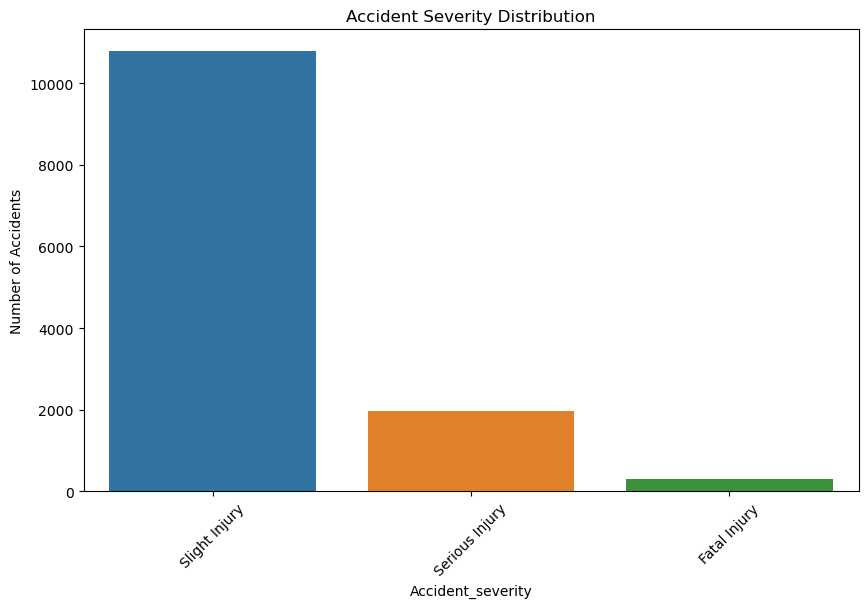

Percentage of accidents by severity:
Accident_severity
Slight Injury     82.492536
Serious Injury    15.126694
Fatal Injury       2.380770
Name: proportion, dtype: float64


In [32]:
# Distribution of accident severity
plt.figure(figsize=(10, 6))
severity_counts = df['Accident_severity'].value_counts()
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title('Accident Severity Distribution')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Percentage of each severity level
severity_pct = df['Accident_severity'].value_counts(normalize=True) * 100
print("Percentage of accidents by severity:")
print(severity_pct)


<Figure size 1200x600 with 0 Axes>

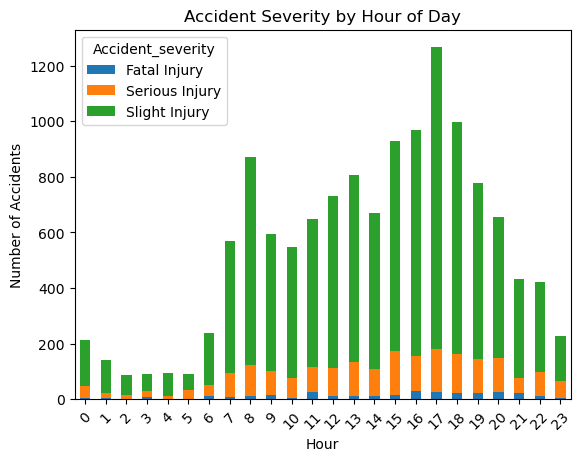

<Figure size 1200x600 with 0 Axes>

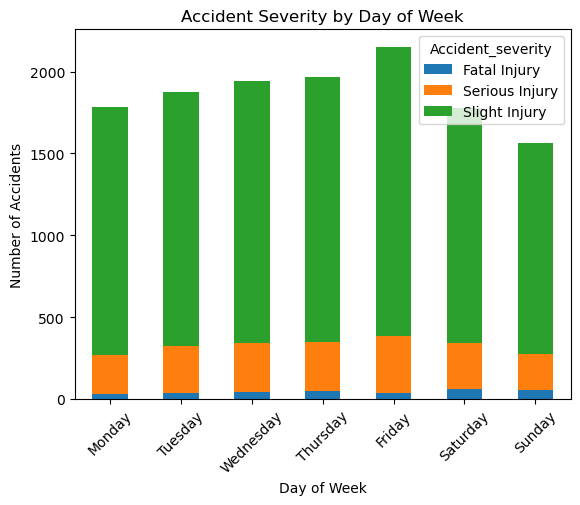

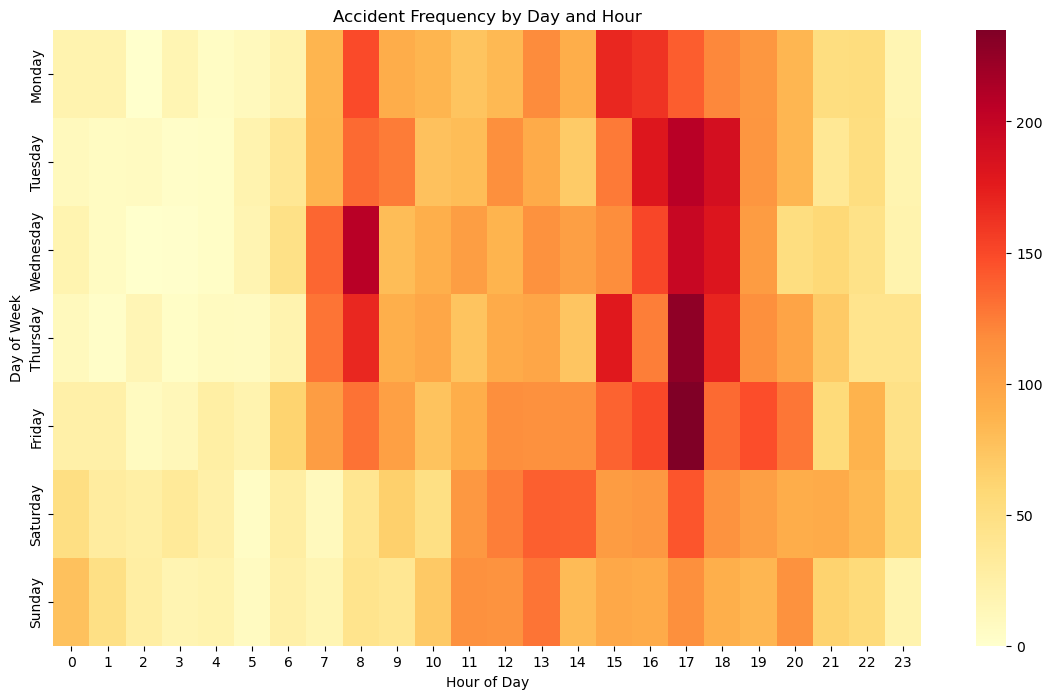

In [33]:
# Accidents by hour of day
plt.figure(figsize=(12, 6))
hourly_counts = df.groupby(['Hour', 'Accident_severity']).size().unstack()
hourly_counts.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accidents by day of week
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df.groupby(['Day_of_week', 'Accident_severity']).size().unstack()
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Create a heatmap of accidents by day and hour
day_hour = pd.crosstab(df['Day_of_week'], df['Hour'])
day_hour = day_hour.reindex(day_order)

plt.figure(figsize=(14, 8))
sns.heatmap(day_hour, cmap='YlOrRd', annot=False)
plt.title('Accident Frequency by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


<Figure size 1200x600 with 0 Axes>

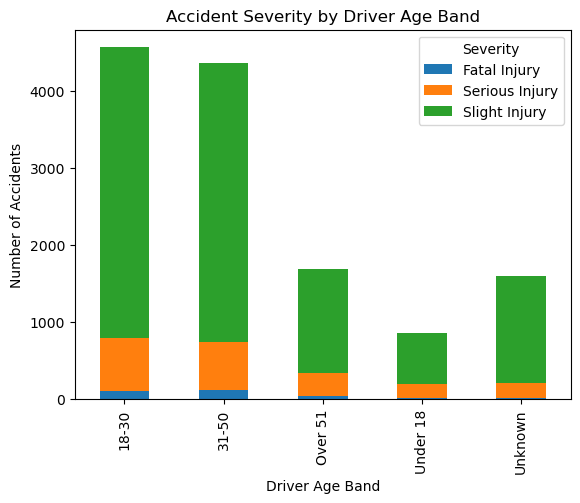

<Figure size 1200x600 with 0 Axes>

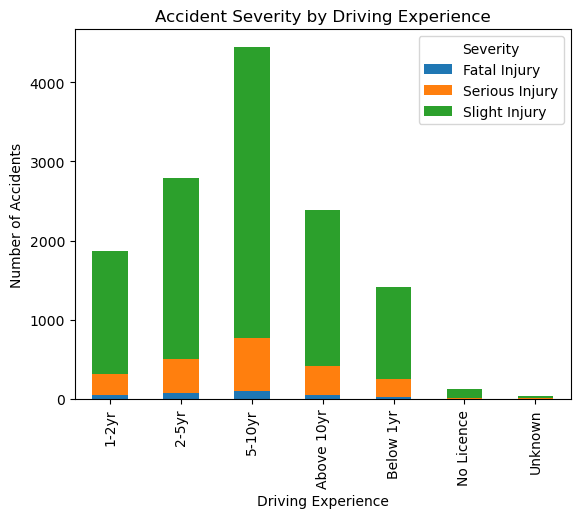

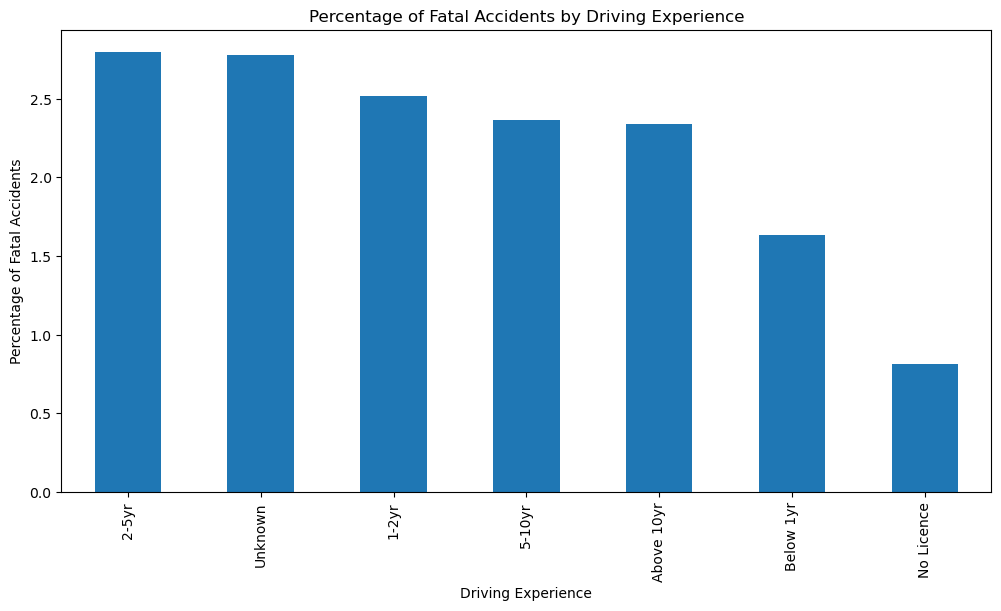

In [34]:
# Accidents by driver age band
plt.figure(figsize=(12, 6))
age_severity = pd.crosstab(df['Age_band_of_driver'], df['Accident_severity'])
age_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Driver Age Band')
plt.xlabel('Driver Age Band')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

# Accidents by driving experience
plt.figure(figsize=(12, 6))
exp_severity = pd.crosstab(df['Driving_experience'], df['Accident_severity'])
exp_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

# Calculate risk ratio: Fatal accidents vs. driving experience
exp_severity_pct = exp_severity.div(exp_severity.sum(axis=1), axis=0) * 100
plt.figure(figsize=(12, 6))
exp_severity_pct['Fatal Injury'].sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Fatal Accidents by Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Percentage of Fatal Accidents')
plt.show()


<Figure size 1200x600 with 0 Axes>

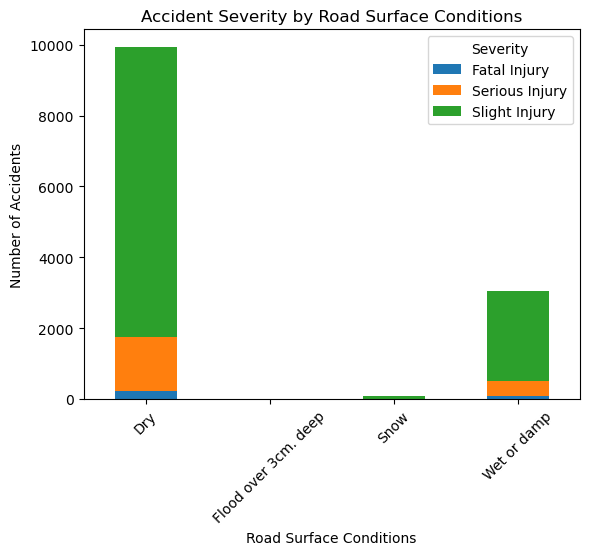

<Figure size 1200x600 with 0 Axes>

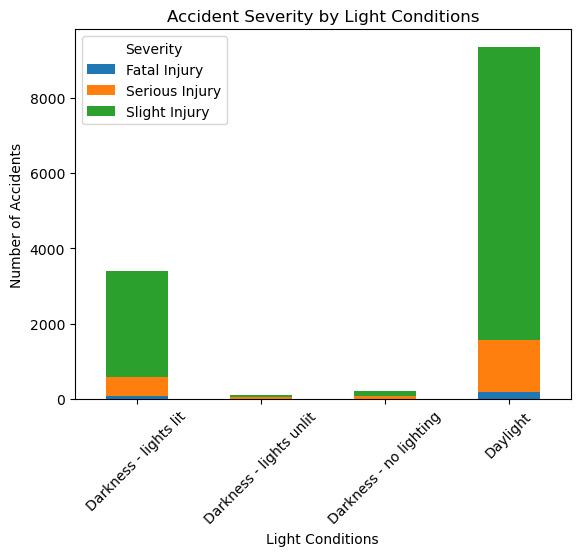

<Figure size 1200x600 with 0 Axes>

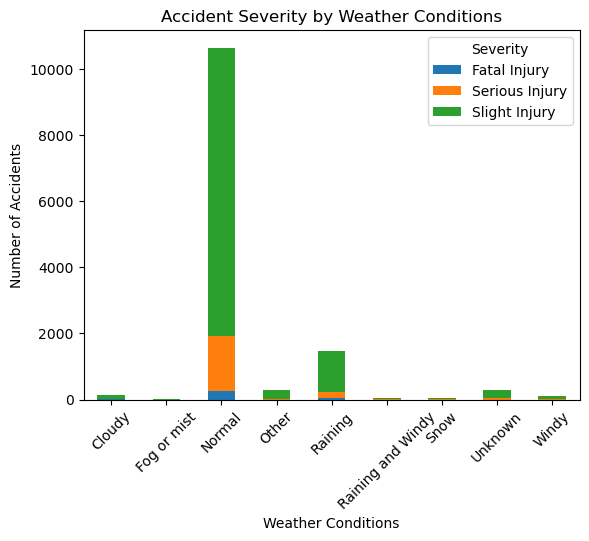

In [35]:
# Road surface conditions vs. accident severity
plt.figure(figsize=(12, 6))
road_severity = pd.crosstab(df['Road_surface_conditions'], df['Accident_severity'])
road_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

# Light conditions vs. accident severity
plt.figure(figsize=(12, 6))
light_severity = pd.crosstab(df['Light_conditions'], df['Accident_severity'])
light_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

# Weather conditions vs. accident severity
plt.figure(figsize=(12, 6))
weather_severity = pd.crosstab(df['Weather_conditions'], df['Accident_severity'])
weather_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()


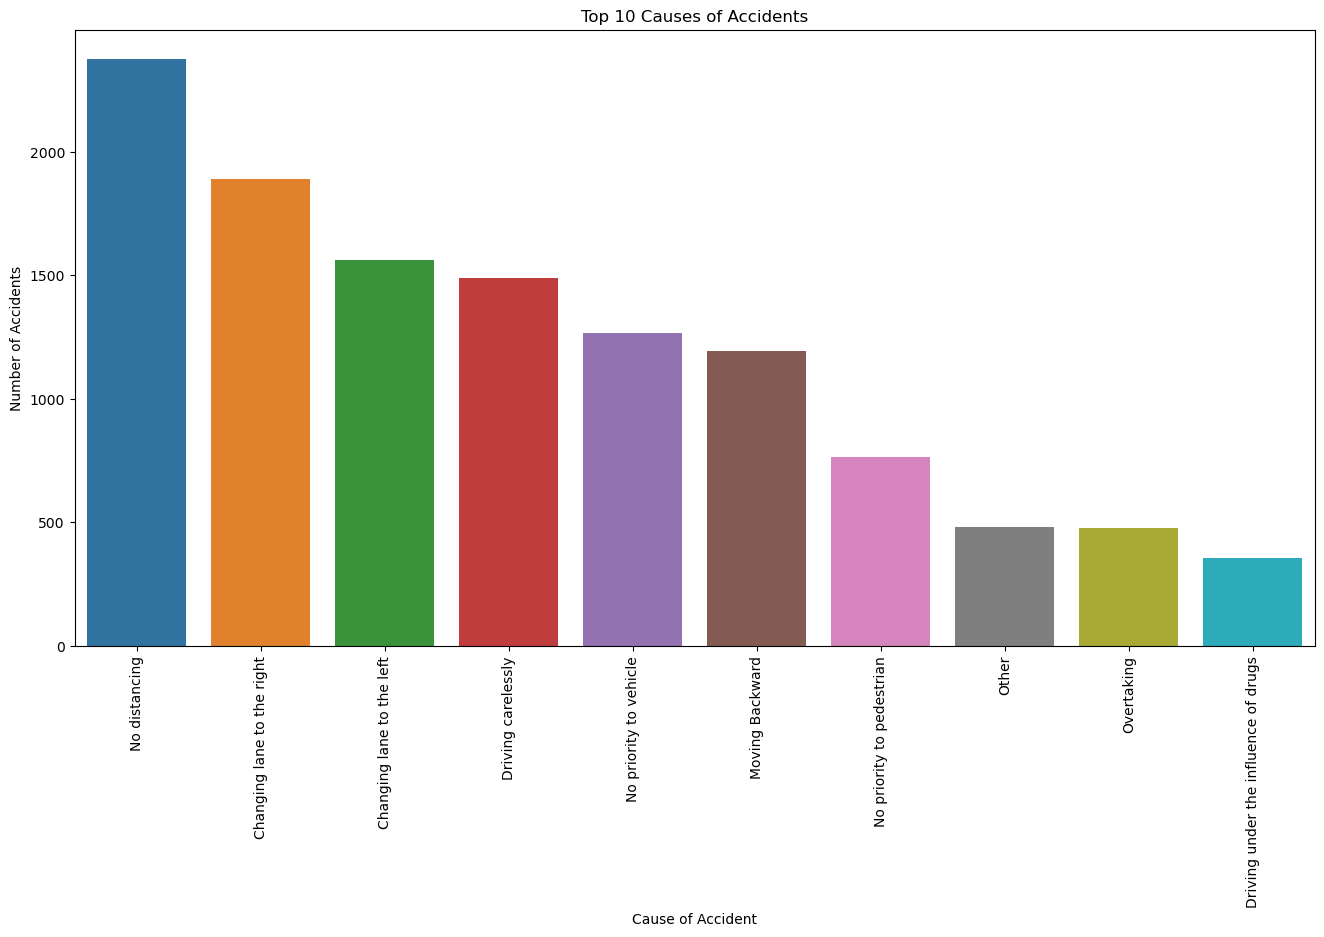

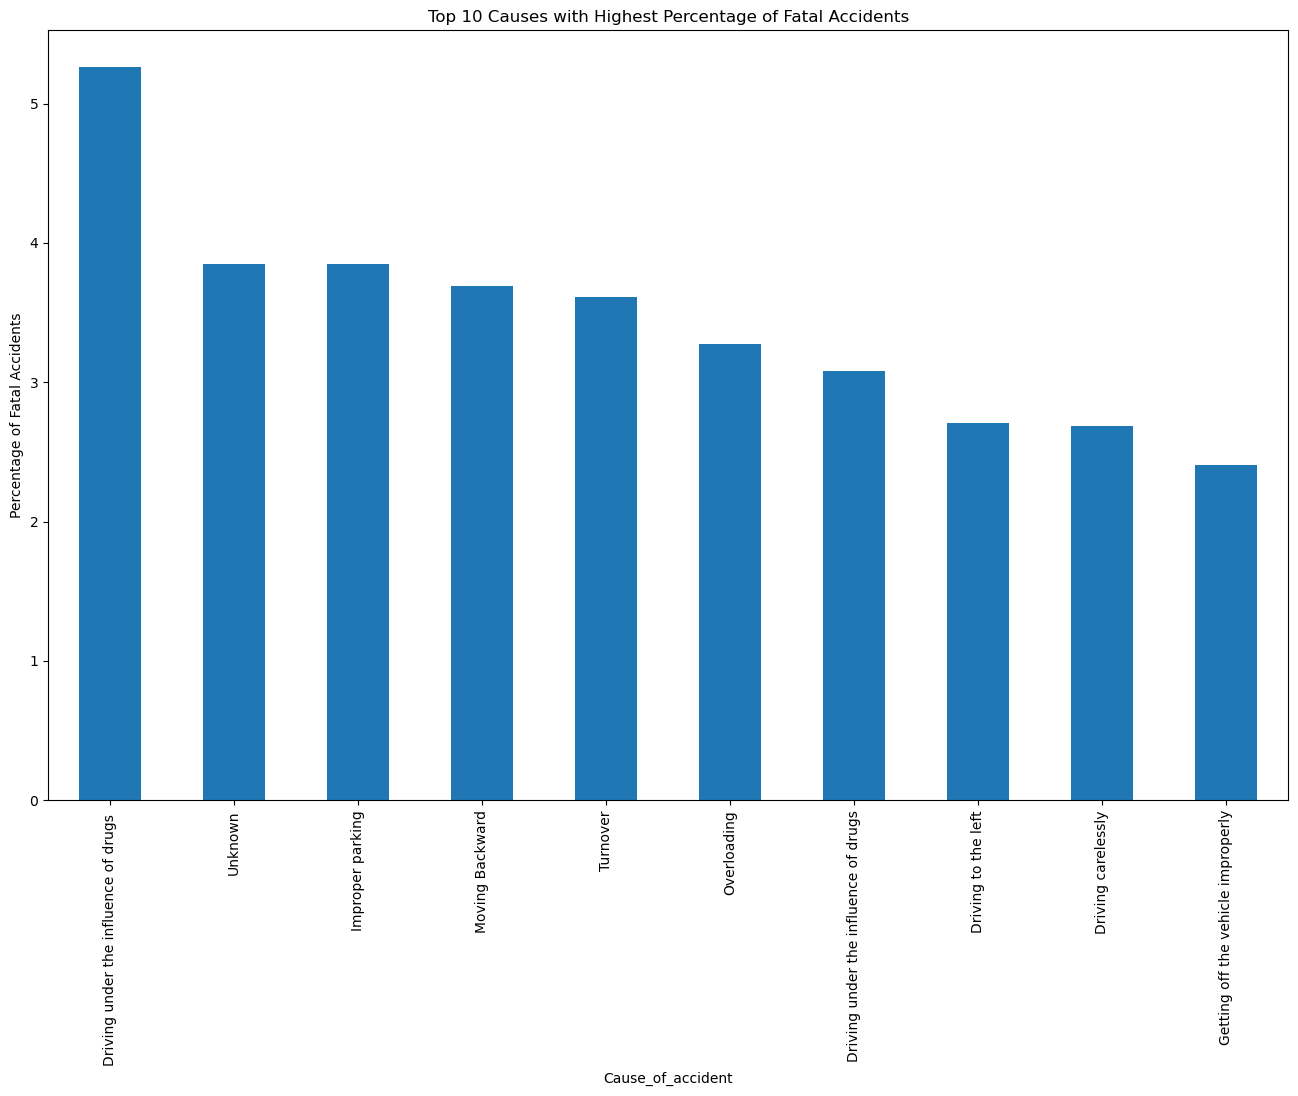

In [36]:
# Top causes of accidents
plt.figure(figsize=(16, 8))
cause_counts = df['Cause_of_accident'].value_counts().head(10)
sns.barplot(x=cause_counts.index, y=cause_counts.values)
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# Causes of accidents by severity (focusing on fatal)
plt.figure(figsize=(16, 10))
cause_severity = pd.crosstab(df['Cause_of_accident'], df['Accident_severity'])
cause_severity_pct = cause_severity.div(cause_severity.sum(axis=1), axis=0) * 100
cause_severity_pct['Fatal Injury'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Causes with Highest Percentage of Fatal Accidents')
plt.ylabel('Percentage of Fatal Accidents')
plt.xticks(rotation=90)
plt.show()


In [37]:
# Create binary features
df['Is_Weekend'] = df['Day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
df['Is_Rush_Hour'] = df['Hour'].apply(lambda x: 1 if x in [7, 8, 17, 18, 19] else 0)
df['Is_Night'] = df['Light_conditions'].apply(lambda x: 1 if 'Darkness' in str(x) else 0)

# Create severity binary target (for binary classification)
df['Is_Severe'] = df['Accident_severity'].apply(lambda x: 1 if x in ['Fatal Injury', 'Serious Injury'] else 0)

# Group rare categories for vehicle type
vehicle_counts = df['Type_of_vehicle'].value_counts()
threshold = len(df) * 0.01  # 1% threshold
rare_vehicles = vehicle_counts[vehicle_counts < threshold].index
df['Vehicle_type_grouped'] = df['Type_of_vehicle'].apply(
    lambda x: 'Other' if x in rare_vehicles else x)


Model Performance Metrics:
Accuracy: 0.8230
ROC-AUC: 0.6280

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2694
           1       0.47      0.09      0.15       572

    accuracy                           0.82      3266
   macro avg       0.65      0.54      0.53      3266
weighted avg       0.77      0.82      0.77      3266



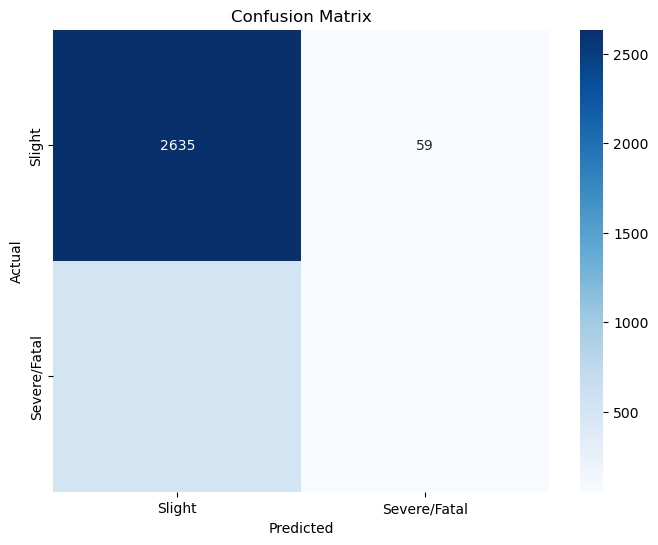

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Select features for modeling (avoid using variables not known at prediction time)
features = [
    'Day_of_week', 'Time_of_day', 'Is_Weekend', 'Is_Rush_Hour',
    'Age_band_of_driver', 'Drivers_gender', 'Driving_experience',
    'Vehicle_type_grouped', 'Area_accident_occured',
    'Road_allignment', 'Road_surface_type', 'Road_surface_conditions',
    'Light_conditions', 'Is_Night', 'Weather_conditions',
    'Number_of_vehicles_involved'
]

# Prepare data for modeling
X = df[features]
y = df['Is_Severe']  # Binary target (severe/fatal vs slight)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = [c for c in X.columns if X[c].dtype.kind in ['i', 'f']]
categorical_features = [c for c in X.columns if X[c].dtype.kind not in ['i', 'f']]

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create and train a Random Forest model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:,1]

# Evaluate model performance
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Slight', 'Severe/Fatal'],
            yticklabels=['Slight', 'Severe/Fatal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


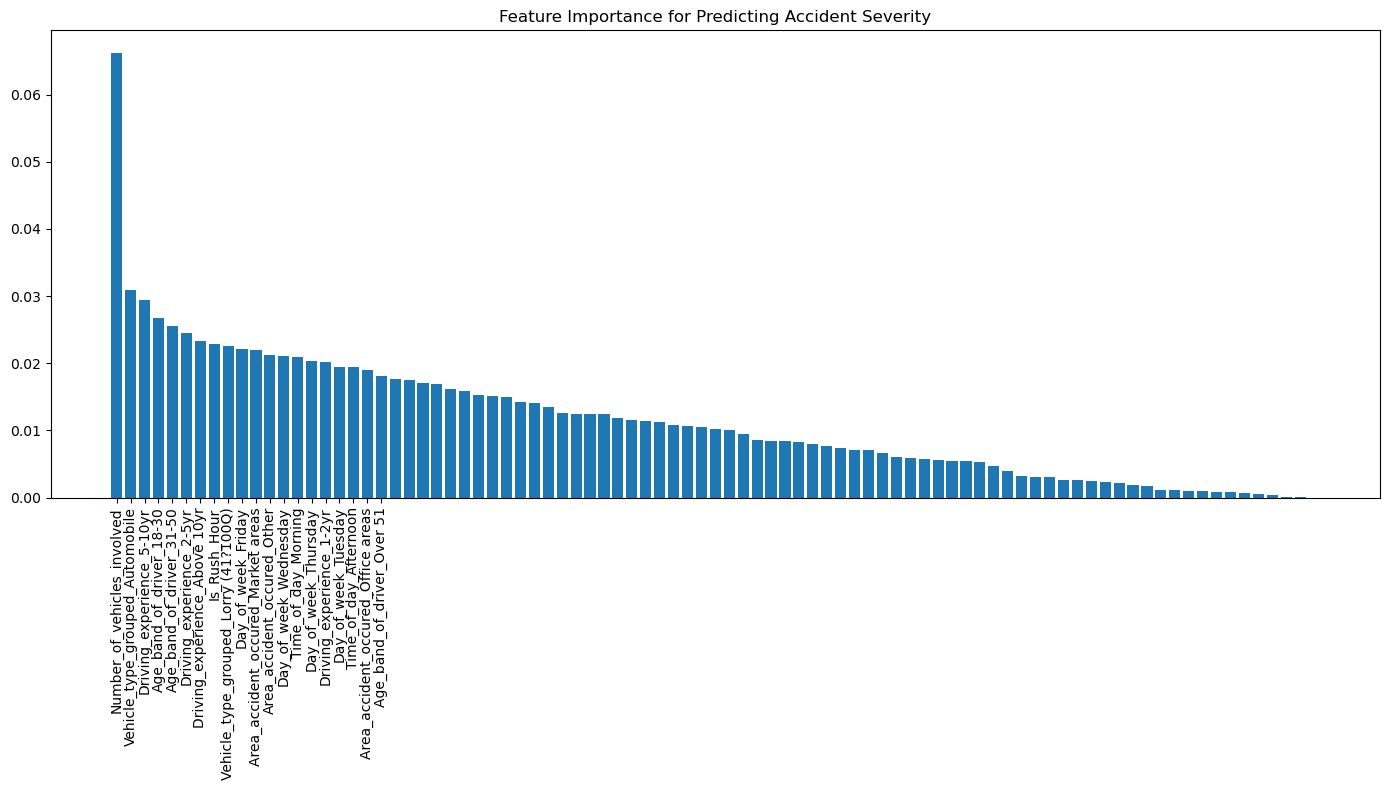

In [39]:
# Extract the fitted classifier from the pipeline
rf_model = rf_pipeline.named_steps['classifier']

# Get feature names after preprocessing (one-hot encoding)
preprocessor = rf_pipeline.named_steps['preprocessor']
ohe = preprocessor.named_transformers_['cat']
feature_names = (
    numeric_features +
    list(ohe.get_feature_names_out(categorical_features))
)

# Get and sort feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(14, 8))
plt.title('Feature Importance for Predicting Accident Severity')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(min(20, len(importances))), 
           [feature_names[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()


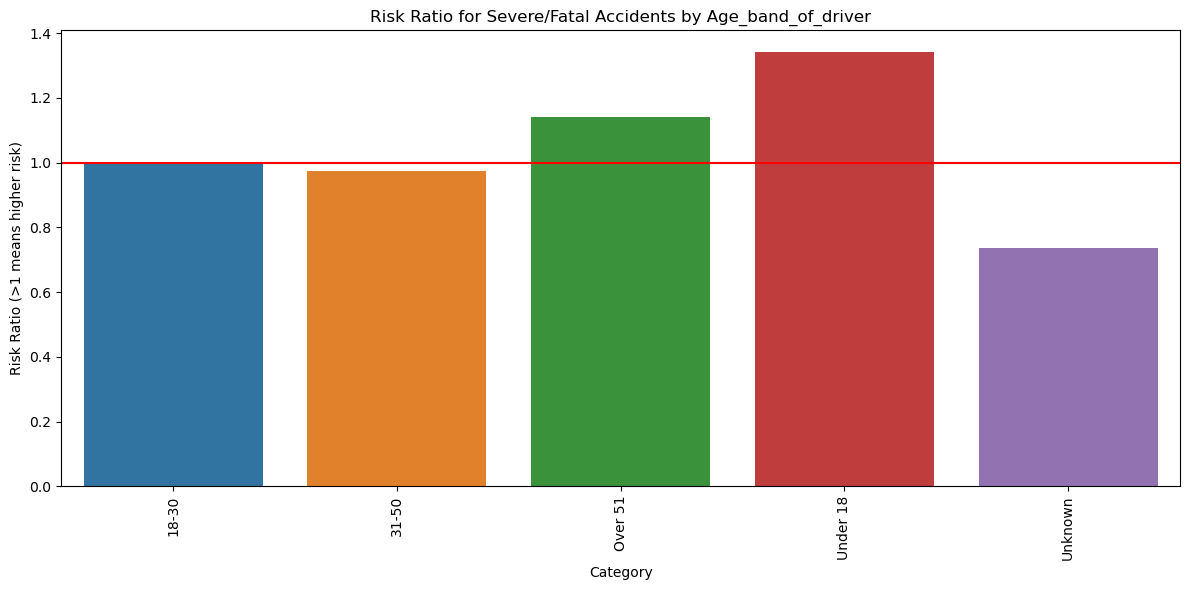

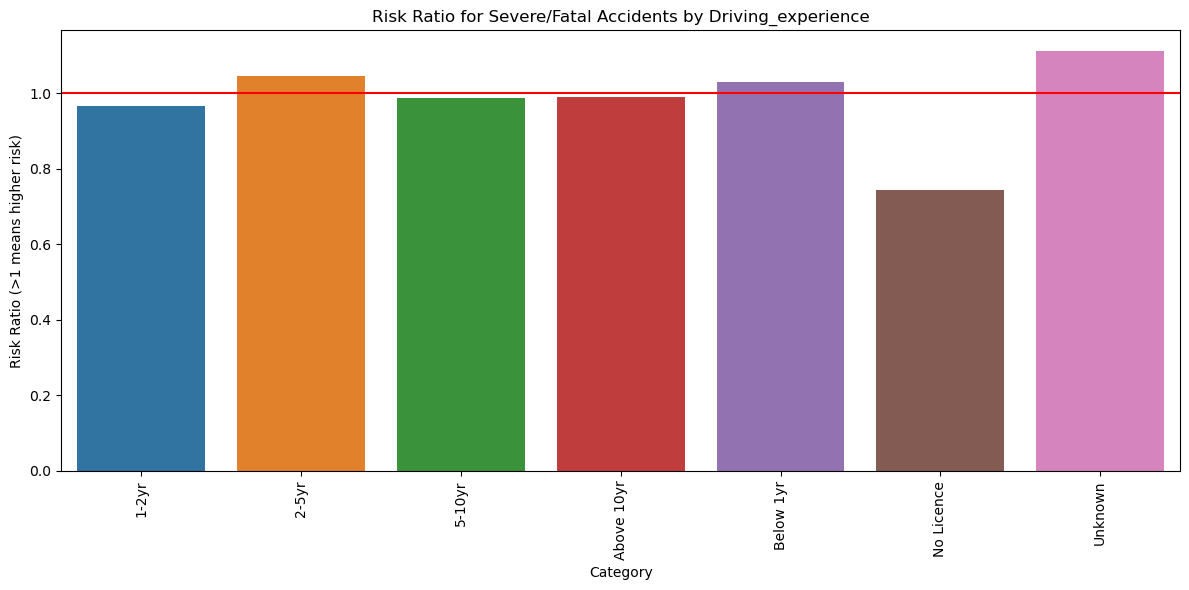

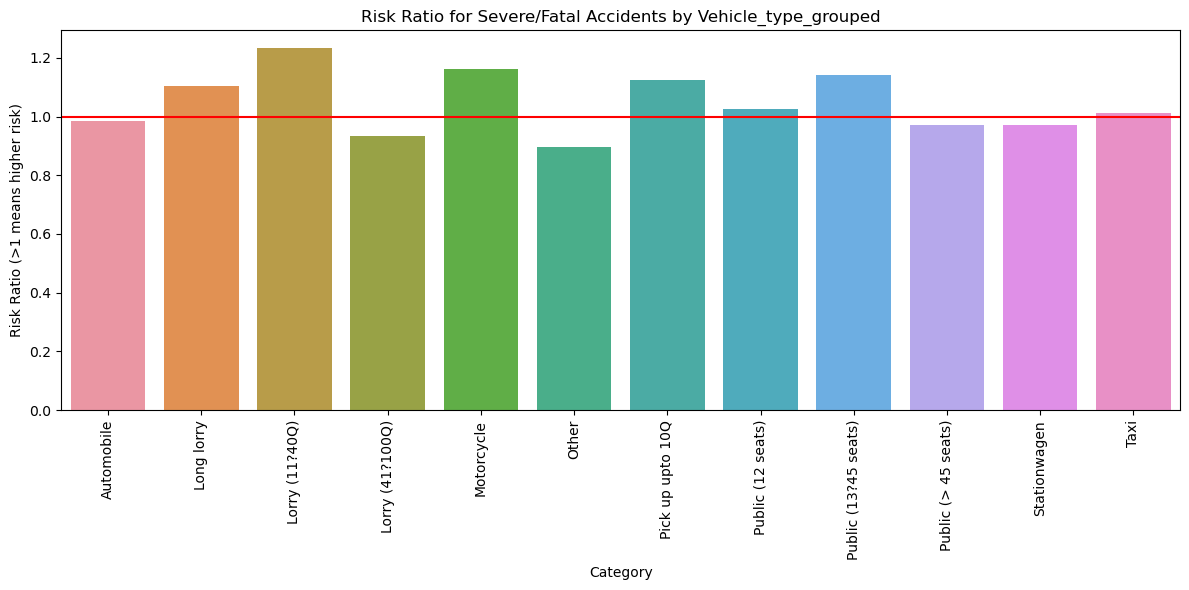

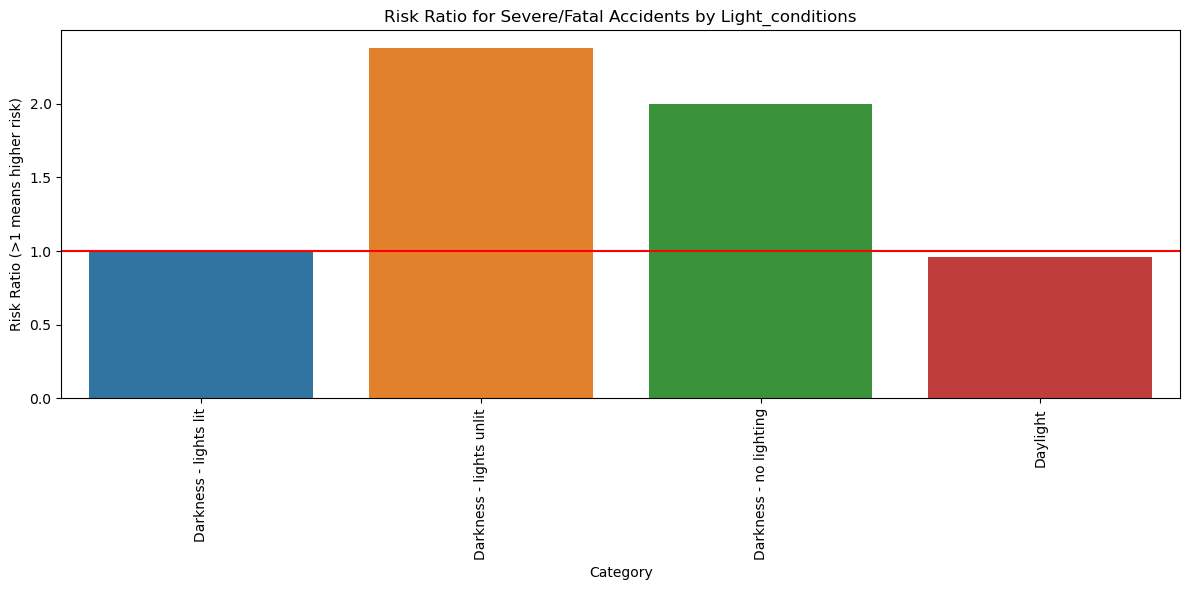

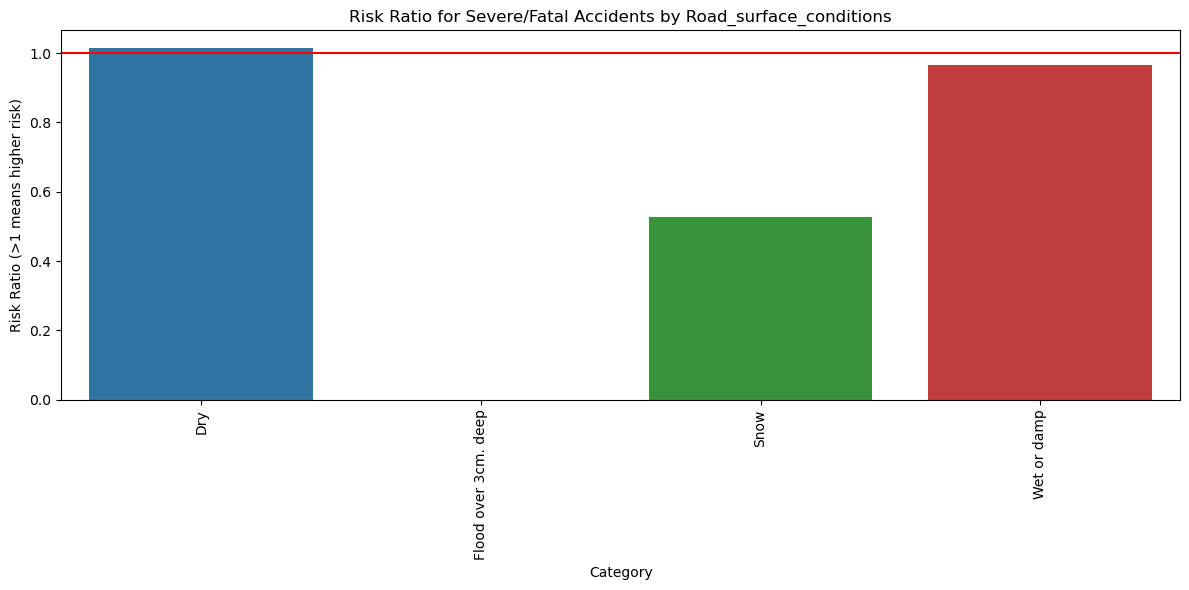

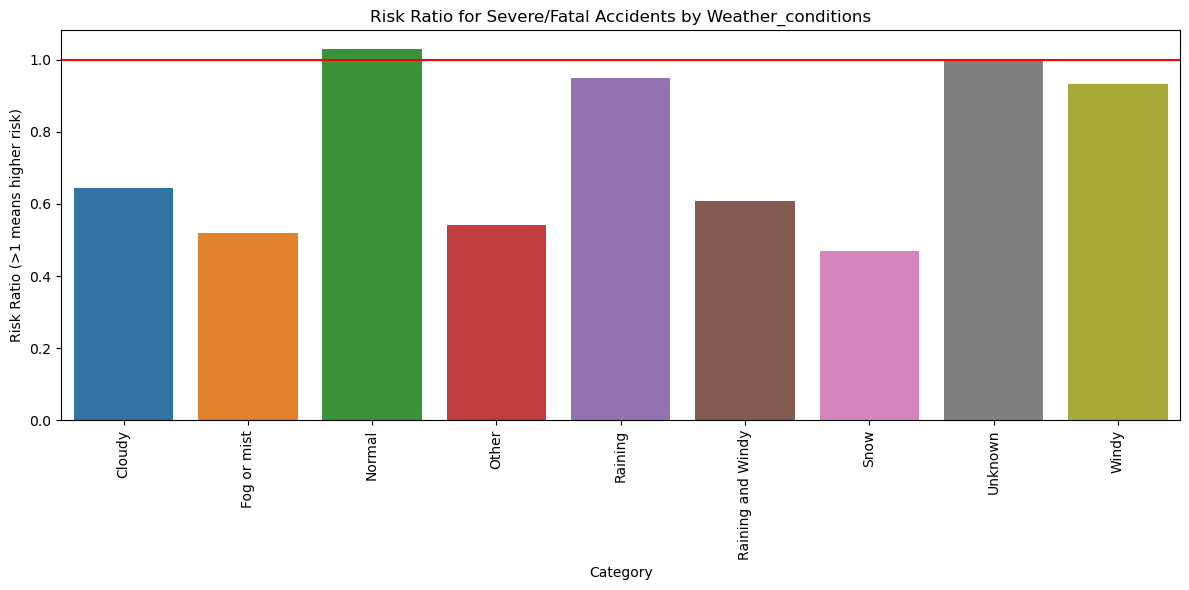

In [40]:
from scipy.stats import chi2_contingency

# Function to calculate risk ratio and significance
def calculate_risk_ratio(feature, df):
    # Create contingency table
    contingency = pd.crosstab(df[feature], df['Is_Severe'])
    
    # Calculate risk ratio
    risk_ratio = (contingency[1] / contingency.sum(axis=1)) / (contingency[1].sum() / contingency.values.sum())
    
    # Calculate chi-square p-value
    chi2, p, _, _ = chi2_contingency(contingency)
    
    return pd.DataFrame({
        'Category': risk_ratio.index,
        'Risk_Ratio': risk_ratio.values,
        'P_Value': p
    })

# Calculate risk ratios for key features
key_features = ['Age_band_of_driver', 'Driving_experience', 'Vehicle_type_grouped',
               'Light_conditions', 'Road_surface_conditions', 'Weather_conditions']

# Visualize risk ratios
for feature in key_features:
    risk_df = calculate_risk_ratio(feature, df)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Risk_Ratio', data=risk_df)
    plt.title(f'Risk Ratio for Severe/Fatal Accidents by {feature}')
    plt.ylabel('Risk Ratio (>1 means higher risk)')
    plt.axhline(y=1, color='r', linestyle='-')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



---
#### **Findings**
---
| Factor / Finding                       | Key Insight / Pattern                                                                                                 | Actionable Recommendation                                                      |
|-----------------------------------------|----------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Accident Severity**                   | Most are slight injuries; serious/fatal are rare but critical.                                                        | Maintain strong minor injury response; prioritize prevention/rapid response for severe cases. |
| **Peak Times**                          | Accidents spike at 8–10 AM and 4–7 PM, especially late afternoons and Fridays.                                        | Intensify enforcement and awareness during rush hours and Fridays.              |
| **Day of Week**                         | Weekdays, especially Friday, have more accidents; weekends slightly lower.                                            | Focus road safety campaigns and patrols on high-risk weekdays.                  |
| **Driving Experience**                  | Most accidents with 5–10 years’ experience; highest fatal % for 2–5 years and unknown.                               | Target safety refreshers at 2–10 year drivers; enforce experience documentation.|
| **Driver Age**                          | Under 18 and over 51 have highest risk for severe/fatal accidents.                                                    | Stricter licensing and targeted education for young/elderly drivers.            |
| **Number of Vehicles Involved**         | Multi-vehicle accidents have higher severity.                                                                         | Prioritize multi-vehicle accident prevention and rapid response.                |
| **Road Surface & Weather**              | Most accidents on dry roads/normal weather, but wet/damp and windy conditions increase severity risk.                 | Maintain safety focus in all weather; enhance drainage; issue rain/wind warnings.|
| **Light Conditions**                    | Most accidents in daylight, but darkness (unlit/no lighting) increases severity risk.                                 | Upgrade street lighting; night-driving safety campaigns; increase night patrols.|
| **Vehicle Type**                        | Long lorries and motorcycles have higher risk for severe/fatal accidents.                                             | Stricter regulations and safety checks for high-risk vehicles.                  |
| **Top Causes of Accidents**             | "No distancing", "Changing lane", "Careless driving" are leading causes.                                              | Enforce safe distances, stricter lane discipline, anti-careless driving campaigns.|
| **Fatal Accident Causes**               | "Drugs", "Improper parking", "Overloading", "Moving backward" have highest fatality %.                               | Target enforcement/awareness on these specific behaviors.                       |
| **Model Performance**                   | Model predicts slight injuries well, struggles with severe/fatal.                                                     | Collect more severe/fatal data; tune model for sensitivity; consider cost-sensitive learning. |

---

#### **Summary of Key Recommendations**

- **Enforce and educate** on safe driving for all ages and experience levels, especially 2–10 years and young/elderly drivers.
- **Target high-risk times and locations** with increased patrols and public awareness (rush hours, Fridays, night/dark areas).
- **Upgrade infrastructure** (lighting, drainage) and enforce safety for high-risk vehicles and behaviors.
- **Broaden safety campaigns** to include all weather and road conditions, not just the obvious risks.
- **Improve data and modeling** for better prediction and prevention of severe/fatal accidents.

---
